# Lab 02: Image Processing

## Setup

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to display images in RGB
def show_img(img, title="Image"):
    if len(img.shape) == 3:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

## 1. Load and Display Original Image

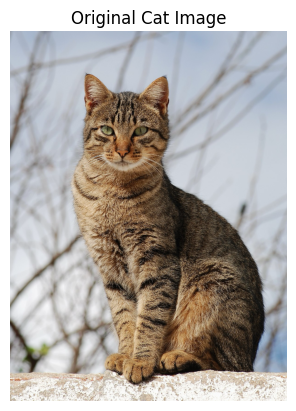

In [2]:
img_cat = cv2.imread('cat.png')
# Check if loaded correctly
if img_cat is None:
    print("Error loading cat.png")
else:
    # Convert BGR to RGB for matplotlib display
    img_cat_rgb = cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB)
    plt.imshow(img_cat_rgb)
    plt.title("Original Cat Image")
    plt.axis('off')
    plt.show()

## 1. Box Filter (Blurring)

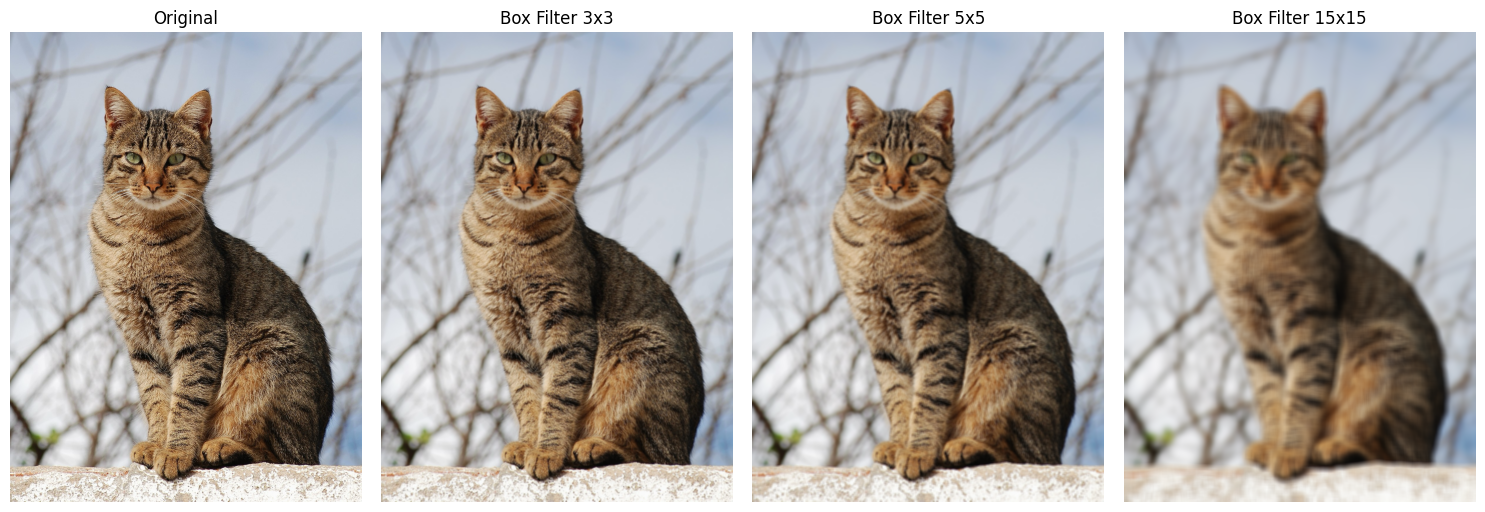

In [3]:
k_sizes = [3, 5, 15]
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 4, 1)
show_img(img_cat, "Original")

for i, k in enumerate(k_sizes):
    # Standard Box Filter (Average)
    blur = cv2.blur(img_cat, (k, k))
    plt.subplot(1, 4, i+2)
    show_img(blur, f"Box Filter {k}x{k}")

plt.tight_layout()
plt.show()

## 2. Gaussian Filter

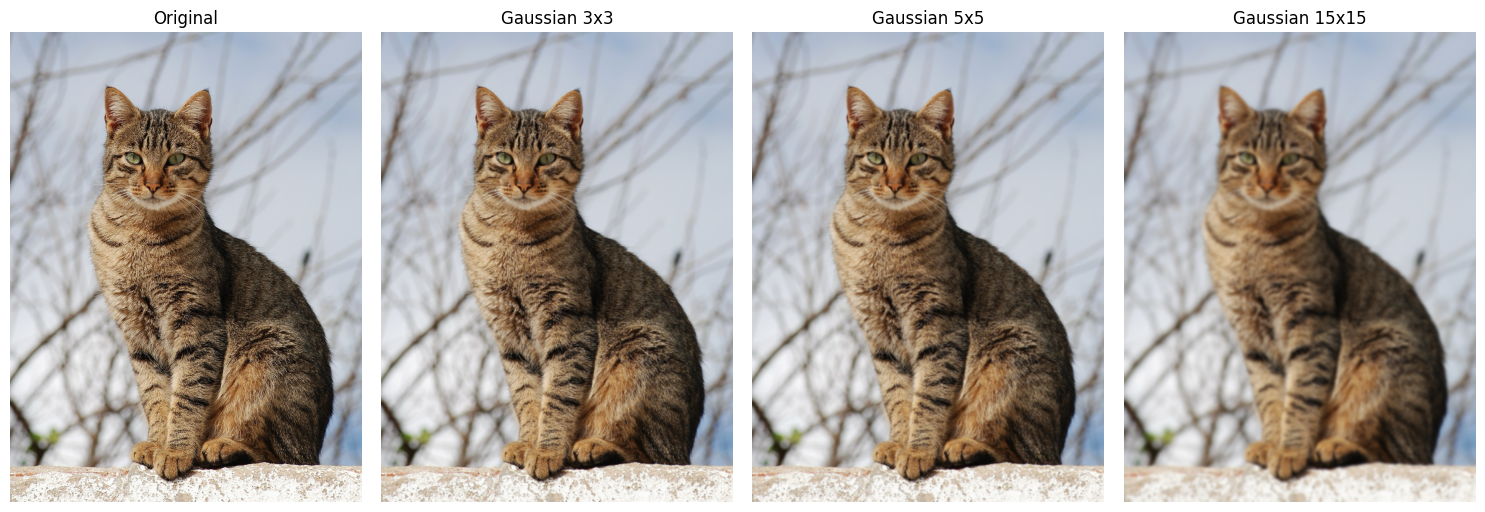

In [4]:
k_sizes = [3, 5, 15]
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
show_img(img_cat, "Original")

for i, k in enumerate(k_sizes):
    # Gaussian Blur
    blur = cv2.GaussianBlur(img_cat, (k, k), 0)
    plt.subplot(1, 4, i+2)
    show_img(blur, f"Gaussian {k}x{k}")

plt.tight_layout()
plt.show()

## 3. Median Filter

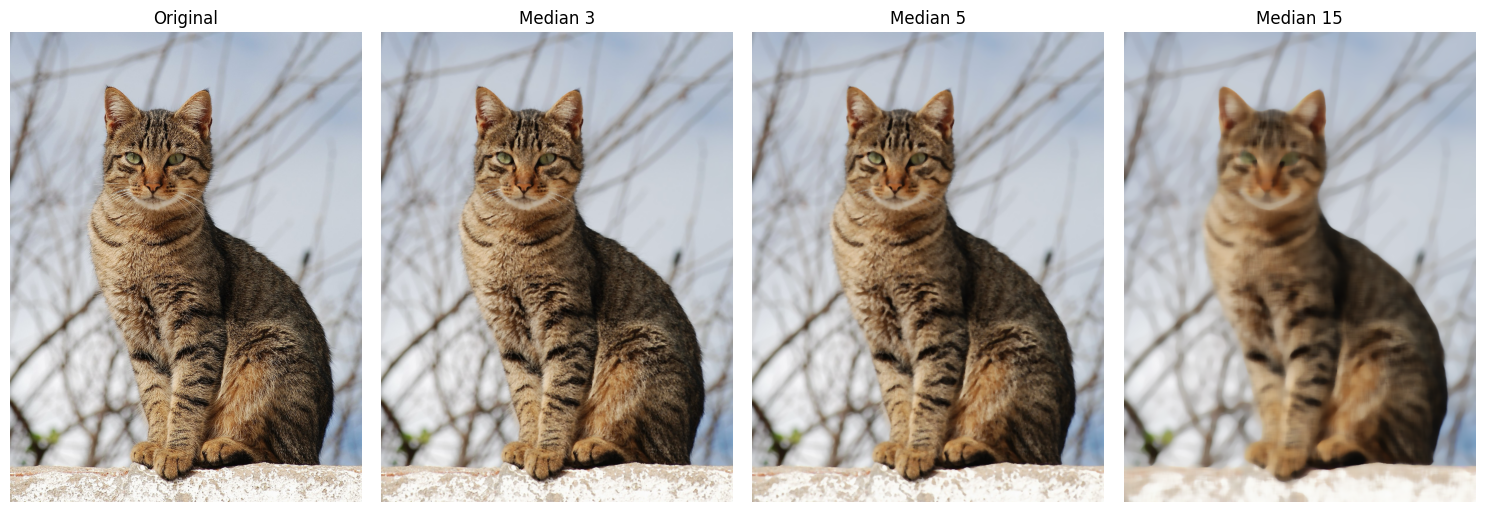

In [5]:
k_sizes = [3, 5, 15]
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
show_img(img_cat, "Original")

for i, k in enumerate(k_sizes):
    # Median Blur
    blur = cv2.medianBlur(img_cat, k)
    plt.subplot(1, 4, i+2)
    show_img(blur, f"Median {k}")

plt.tight_layout()
plt.show()

## 4. Comparisons on Pepper Noise Images

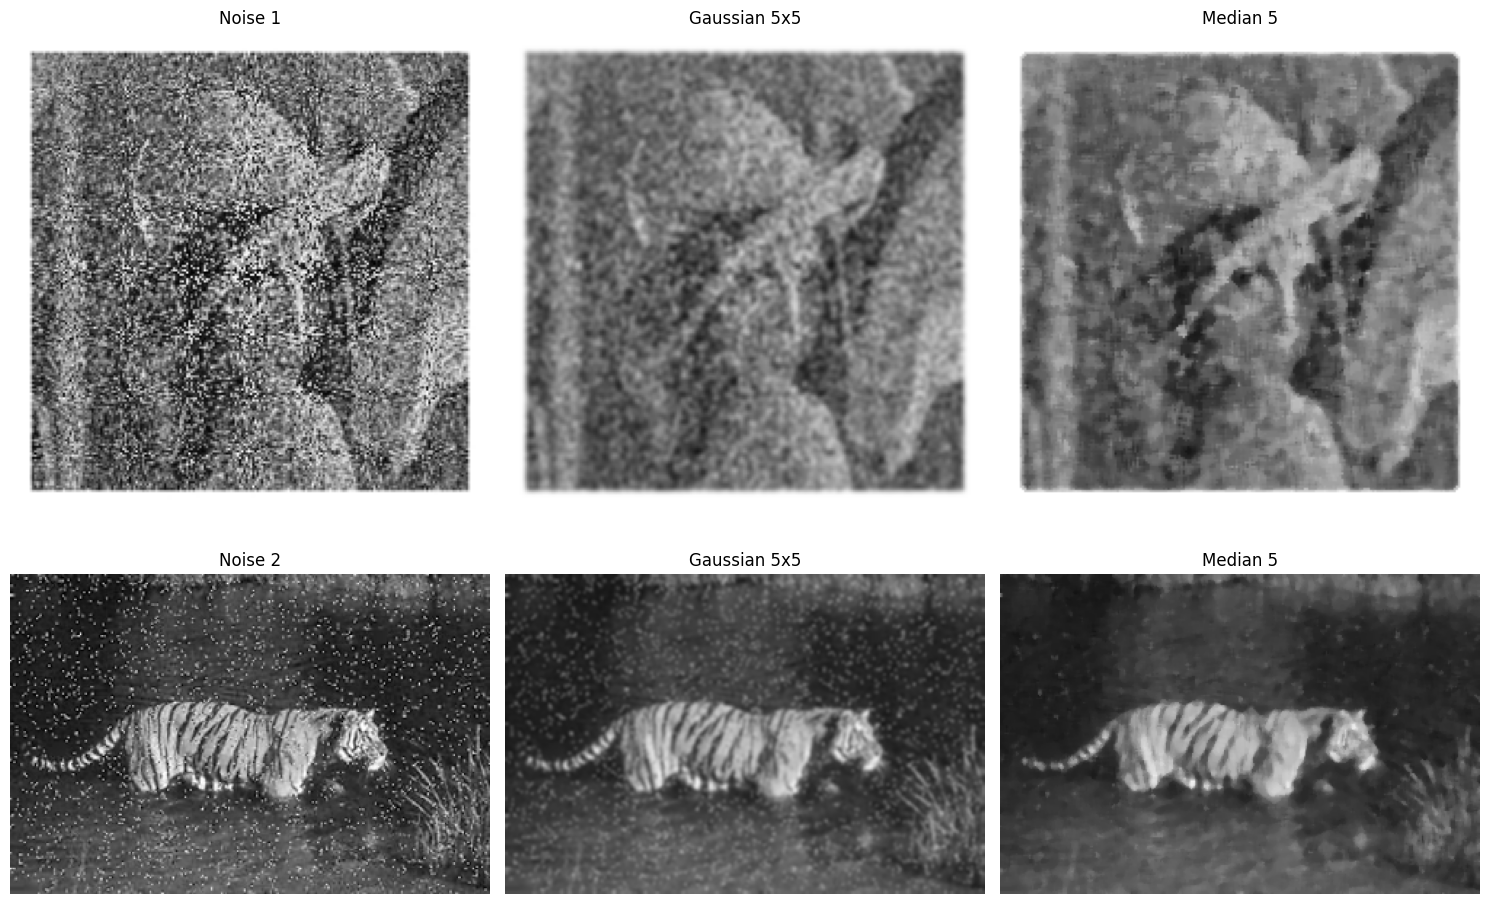

In [6]:
img_n1 = cv2.imread('pepper_noise.png')
img_n2 = cv2.imread('pepper_noise02.png')

if img_n1 is None or img_n2 is None:
    print("Warning: Check filenames for pepper noise images.")
else:
    # Apply filters
    # Gaussian (smears noise)
    g1 = cv2.GaussianBlur(img_n1, (5,5), 0)
    g2 = cv2.GaussianBlur(img_n2, (5,5), 0)
    
    # Median (removes noise)
    m1 = cv2.medianBlur(img_n1, 5)
    m2 = cv2.medianBlur(img_n2, 5)
    
    # Plot
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Image 1
    plt.sca(axs[0,0])
    show_img(img_n1, "Noise 1")
    plt.sca(axs[0,1])
    show_img(g1, "Gaussian 5x5")
    plt.sca(axs[0,2])
    show_img(m1, "Median 5")
    
    # Image 2
    plt.sca(axs[1,0])
    show_img(img_n2, "Noise 2")
    plt.sca(axs[1,1])
    show_img(g2, "Gaussian 5x5")
    plt.sca(axs[1,2])
    show_img(m2, "Median 5")
    
    plt.tight_layout()
    plt.show()

**Observations Step 5**:
- **Gaussian Filter**: Blurs the noise but spreads the intensity of the white/black dots, making them blurry patches rather than removing them completely.
- **Median Filter**: Is extremely effective against 'Salt and Pepper' noise because it replaces the noisy pixel with the median of the neighborhood, effectively discarding the outlier values (0 or 255) that constitute the noise.

## 6. Histogram Equalization

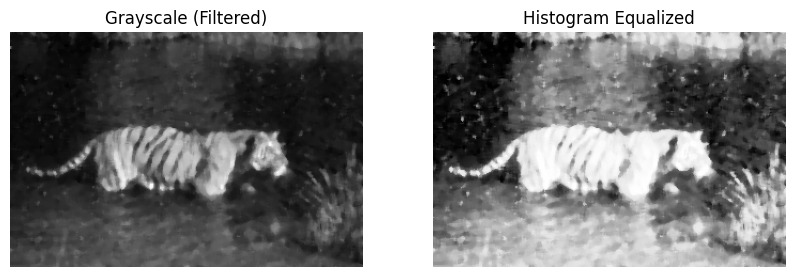

In [7]:
# Load image
img_h = cv2.imread('pepper_noise02.png')

# 1. Clean noise first (important, otherwise we boost noise)
blur_h = cv2.medianBlur(img_h, 5)

# 2. Convert to Grayscale
gray_h = cv2.cvtColor(blur_h, cv2.COLOR_BGR2GRAY)

# 3. Equalize
equ_h = cv2.equalizeHist(gray_h)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_h, cmap='gray')
plt.title("Grayscale (Filtered)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equ_h, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')
plt.show()

## 7. Arithmetic & Logic Operations (Ball Extraction)

Original Shapes: (236, 290, 3) (240, 292, 3)
Cropped Shapes: (155, 190, 3) (155, 190, 3)


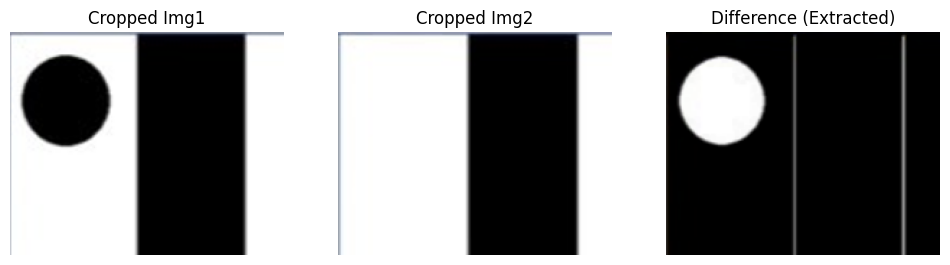

In [8]:
img1 = cv2.imread('exT3_01.png')
img2 = cv2.imread('exT3_02.png')

if img1 is None or img2 is None:
    print("Error loading exT3 images")
else:
    # a. Crop
    print("Original Shapes:", img1.shape, img2.shape)
    img1_c = img1[:155, 1:191]
    img2_c = img2[:155, :190]
    print("Cropped Shapes:", img1_c.shape, img2_c.shape)
    
    # b. Invert (Negative)
    inv_img1 = cv2.bitwise_not(img1_c)
    inv_img2 = cv2.bitwise_not(img2_c)
    
    # c. Process to have only the "ball"
    # We can try absolute difference between the two images.
    # Assuming one image has the ball and the other doesn't, or they have the ball in different positions?
    # Looking at filenames, usually T3_01 and T3_02 are background vs background+ball or similar.
    # Let's assume we want the difference.
    
    diff = cv2.absdiff(img1_c, img2_c)
    
    # If white streaks appear (misalignment), we can use morphological operations
    # Erosion to remove small artifacts
    kernel = np.ones((3,3), np.uint8)
    cleaned_diff = cv2.erode(diff, kernel, iterations=1)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    show_img(img1_c, "Cropped Img1")
    plt.subplot(1, 3, 2)
    show_img(img2_c, "Cropped Img2")
    plt.subplot(1, 3, 3)
    show_img(cleaned_diff, "Difference (Extracted)")
    plt.show()

## Cách xử lý các vệt trắng (White Streaks):

Nếu phép trừ ảnh (subtraction) cơ bản để lại các vệt trắng (do máy ảnh bị rung nhẹ hoặc thay đổi ánh sáng), bạn có thể áp dụng các cách xử lý sau:

1. **Xói mòn hình thái (Morphological Erosion)**: Như đã áp dụng ở trên, kỹ thuật này giúp loại bỏ các nhiễu hoặc các cạnh nhỏ.
2. **Phân ngưỡng (Thresholding)**: Áp dụng ngưỡng nhị phân để loại bỏ các vùng có sự khác biệt về cường độ sáng thấp.
3. **Đăng ký ảnh (Image Registration)**: Sử dụng thuật toán để căn chỉnh các hình ảnh cho khớp nhau trước khi thực hiện phép trừ (đây là kỹ thuật nâng cao).

## Một số bài tập mở rộng: 
1. Sử dụng Backward, forward, central gradient để lọc ảnh. 
2. Sử dụng Finite difference filter để lọc ảnh nhiễu. 
3. Sử dụng Gaussian filter để lọc ảnh. 
4. Sử dụng Sobel detector để xác định biên của ảnh. 
5. Sử dụng Canny edge detector để xác định các cạnh góc ảnh. 
6. Sử dụng Hough transform để xác định các đường thẳng trong ảnh. 

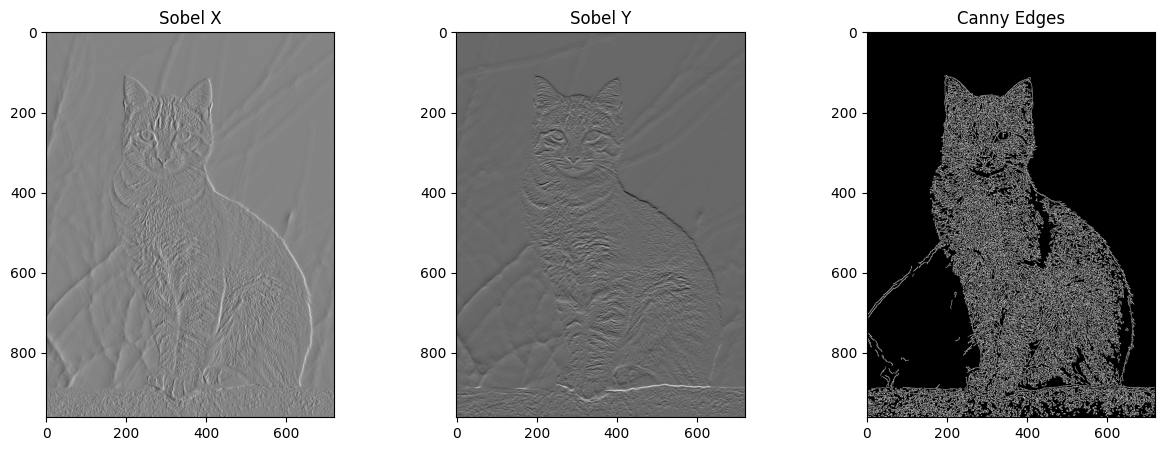

In [9]:
# Define a helper to plot simple gradients
# Let's use the 'cat' image converted to gray
gray_cat = cv2.cvtColor(img_cat, cv2.COLOR_BGR2GRAY)

# 4. Sobel Detector
sobelx = cv2.Sobel(gray_cat, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_cat, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.sqrt(sobelx**2 + sobely**2)

# 5. Canny Edge Detector
canny = cv2.Canny(img_cat, 100, 200)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1); plt.imshow(sobelx, cmap='gray'); plt.title("Sobel X")
plt.subplot(1,3,2); plt.imshow(sobely, cmap='gray'); plt.title("Sobel Y")
plt.subplot(1,3,3); plt.imshow(canny, cmap='gray'); plt.title("Canny Edges")
plt.show()

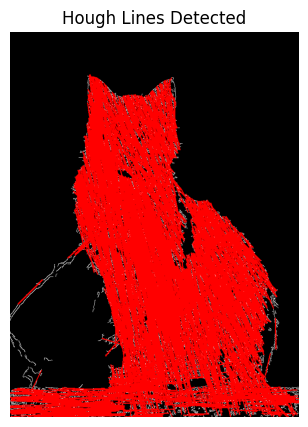

In [10]:
# 6. Hough Transform (Lines)
dst = cv2.Canny(img_cat, 50, 200, None, 3)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

lines = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv2.line(cdst, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 2)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(cdst, cv2.COLOR_BGR2RGB))
plt.title("Hough Lines Detected")
plt.axis('off')
plt.show()